In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import streamlit as st

from recommend_algo import OptimizeClasses, TopicBasedRecommender


df_grad = pd.read_csv("成績データ.csv", encoding="utf-8")
df_grad = df_grad[df_grad['総合評価']!="履修中"]
recommender = TopicBasedRecommender(df_grad, num_topics=6)
recommender.assign_info_to_courses()
recommender.create_lda_model()
keywords_list = recommender.get_keywords_list()
topic_keywords = recommender.get_topic_keywords(keywords_list)
recommender.assign_topic_to_courses()
number_of_recommendations_by_topic = recommender.decide_number_of_recommendations_by_topic()

#for topic, n_r in number_of_recommendations_by_topic:
for topic in range(recommender.num_topics):
    #if n_r == 0:
    #    continue
    temp, your_course = recommender.execute_recommendation(topic)
    print("-" * 50)
    print(f"トピック {topic}")
    print(f"推定関心度：{recommender.user_profile_percent[topic]}%")
    print("推薦授業: ", end='')
    print("、".join(class_ for class_ in temp['授業科目名'].tolist()))
    print("トピック重要ワード: ", end='')
    print("、".join(word for word in topic_keywords[topic][0]))  # リストをカンマ区切りで表示
    print("トピック専門用語: ", end='')
    print("、".join(keyword for keyword in topic_keywords[topic][1]))  # リストをカンマ区切りで表示
    print("このトピックはあなたが履修した以下の授業に基づいています: ", end='')
    print("、".join(class_ for class_ in your_course))
    print()

#df = recommender.df_grad_courses
#opt = OptimizeClasses(df)
#print(opt.optimize())

c:\Users\sueya\Git-Repositories\monketsu\recommend_algo.py:114: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df_grad['総合評価'] = self.df_grad['総合評価'].replace(grade_mapping).astype('int')


[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[(0, 0.016873108), (1, 0.3114667), (2, 0.016841386), (3, 0.016678823), (4, 0.016811157), (5, 0.62132883)], [(0, 0.009274463), (1, 0.009301316), (2, 0.00

In [4]:
!pip show pydantic

Name: pydantic
Version: 2.10.5
Summary: Data validation using Python type hints
Home-page: 
Author: 
Author-email: Samuel Colvin <s@muelcolvin.com>, Eric Jolibois <em.jolibois@gmail.com>, Hasan Ramezani <hasan.r67@gmail.com>, Adrian Garcia Badaracco <1755071+adriangb@users.noreply.github.com>, Terrence Dorsey <terry@pydantic.dev>, David Montague <david@pydantic.dev>, Serge Matveenko <lig@countzero.co>, Marcelo Trylesinski <marcelotryle@gmail.com>, Sydney Runkle <sydneymarierunkle@gmail.com>, David Hewitt <mail@davidhewitt.io>, Alex Hall <alex.mojaki@gmail.com>, Victorien Plot <contact@vctrn.dev>
License: 
Location: C:\Users\sueya\.virtualenvs\monketsu\Lib\site-packages
Requires: annotated-types, pydantic-core, typing-extensions
Required-by: 


In [100]:
recommender.df_combined

授業科目名                                            1倍キーワード  \
0    MDA異分野連携ゼミナール               ['データ分析', '問題解決', 'イノベーション', '人工知能']   
1       社会工学のための数学          ['モデリング', '微積分', '行列', '数学', '方程式', '統計']   
2           ミクロ経済学                                ['関数', '経済', '微積分']   
3       社会シミュレーション  ['システム情報', 'データ分析', 'シミュレーション', 'モデリング', 'メカニズ...   
4            ゲーム理論  ['ゲーム', 'メカニズム', '戦略', '意思決定', '微積分', '均衡', '設計']   
..             ...                                                ...   
277   実世界指向インタフェース  ['人間', '外界', 'メディア', '空間', '情報', 'プログラム', 'インタ...   
278         神経運動制御  ['制御', '神経', '原理', 'システム', 'ロボット', '力学', 'メカニズ...   
279         触覚の計算論  ['神経', '仮想現実', '人間', 'システム', 'インタフェース', 'コンピュー...   
280       実験心理学方法論               ['心理', '物理', '論文', '検定', '事象', '人間']   
281         機械学習演習             ['機械学習', '分析', '人工知能', 'データ分析', 'データ']   

                                               拡張キーワード  \
0    ['人工知能', 'データ分析', 'サイエンス', 'コンピューティング', 'マーケティ...   
1    ['関数', '線形代数', 'プログラミング', '微積分', '数学', '解析', '...   
2    ['関数', '線形代数', '微積分', '財政', '金融', 'アルゴリズム', '社...   
3    ['プログラミング', '解析', 'データ分析', 'システム情報', 'アプリケーション...   
4    ['ゲーム', '戦略', '論理', 'マーケティング', '意思決定', 'システム',...   
..                                                 ...   
277  ['外界', '空間', 'プログラム', 'アプリケーション', 'コンテンツ', 'マー...   
278  ['人工知能', '外界', '物理', '電磁気学', '制御', '原理', '科学',...   
279  ['シミュレーター', '人工知能', '外界', '仮想現実', 'アプリケーション', ...   
280  ['事象', '物理', '論文', '数学', '量子', '人体', '心理学', '心...   
281  ['人工知能', '自然言語処理', 'システム情報', '解析', 'データ分析', 'デ...   

                                                 キーワード  
0    [人工知能, データ分析, サイエンス, コンピューティング, マーケティング, 意思決定,...  
1    [関数, 線形代数, プログラミング, 微積分, 数学, 解析, 調査, 行列, モデリング...  
2    [関数, 線形代数, 微積分, 財政, 金融, アルゴリズム, 社会, 数理, 解法, 方程...  
3    [プログラミング, 解析, データ分析, システム情報, アプリケーション, 情報科学, モ...  
4    [ゲーム, 戦略, 論理, マーケティング, 意思決定, システム, 数理, 問題解決, 政...  
..                                                 ...  
277  [外界, 空間, プログラム, アプリケーション, コンテンツ, マーケティング, ソフトウ...  
278  [人工知能, 外界, 物理, 電磁気学, 制御, 原理, 科学, 力学, 解析, システム,...  
279  [シミュレーター, 人工知能, 外界, 仮想現実, アプリケーション, ハードウェア, 解析...  
280  [事象, 物理, 論文, 数学, 量子, 人体, 心理学, 心理, 生命, 統計, 社会, ...  
281  [人工知能, 自然言語処理, システム情報, 解析, データ分析, データ, 調査, 実証,...  

[282 rows x 4 columns]

In [191]:
temp = recommender.df_grad_courses#.head(5)
temp[['授業科目名', 'キーワード', '関連トピック']]

授業科目名                                              キーワード  関連トピック
0    MDA異分野連携ゼミナール  [人工知能, データ分析, サイエンス, コンピューティング, マーケティング, 意思決定,...       5
1       社会工学のための数学  [関数, 線形代数, プログラミング, 微積分, 数学, 解析, 調査, 行列, モデリング...       4
2           ミクロ経済学  [関数, 線形代数, 微積分, 財政, 金融, アルゴリズム, 社会, 数理, 解法, 方程...       4
3       社会シミュレーション  [プログラミング, 解析, データ分析, システム情報, アプリケーション, 情報科学, モ...       2
4            ゲーム理論  [ゲーム, 戦略, 論理, マーケティング, 意思決定, システム, 数理, 問題解決, 政...       4
..             ...                                                ...     ...
277   実世界指向インタフェース  [外界, 空間, プログラム, アプリケーション, コンテンツ, マーケティング, ソフトウ...       1
278         神経運動制御  [人工知能, 外界, 物理, 電磁気学, 制御, 原理, 科学, 力学, 解析, システム,...       1
279         触覚の計算論  [シミュレーター, 人工知能, 外界, 仮想現実, アプリケーション, ハードウェア, 解析...       1
280       実験心理学方法論  [事象, 物理, 論文, 数学, 量子, 人体, 心理学, 心理, 生命, 統計, 社会, ...       1
281         機械学習演習  [人工知能, 自然言語処理, システム情報, 解析, データ分析, データ, 調査, 実証,...       2

[177 rows x 3 columns]

In [106]:
!pip install networkx


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.7/1.7 MB 3.4 MB/s eta 0:00:00


In [174]:
import japanize_matplotlib

In [186]:
recommender.df_combined.iloc[2]['拡張キーワード']

"['関数', '線形代数', '微積分', '財政', '金融', 'アルゴリズム', '社会', '数理', '解法', '方程式', '経済']"

In [188]:
recommender.df_combined.iloc[2]['1倍キーワード']

"['関数', '経済', '微積分']"

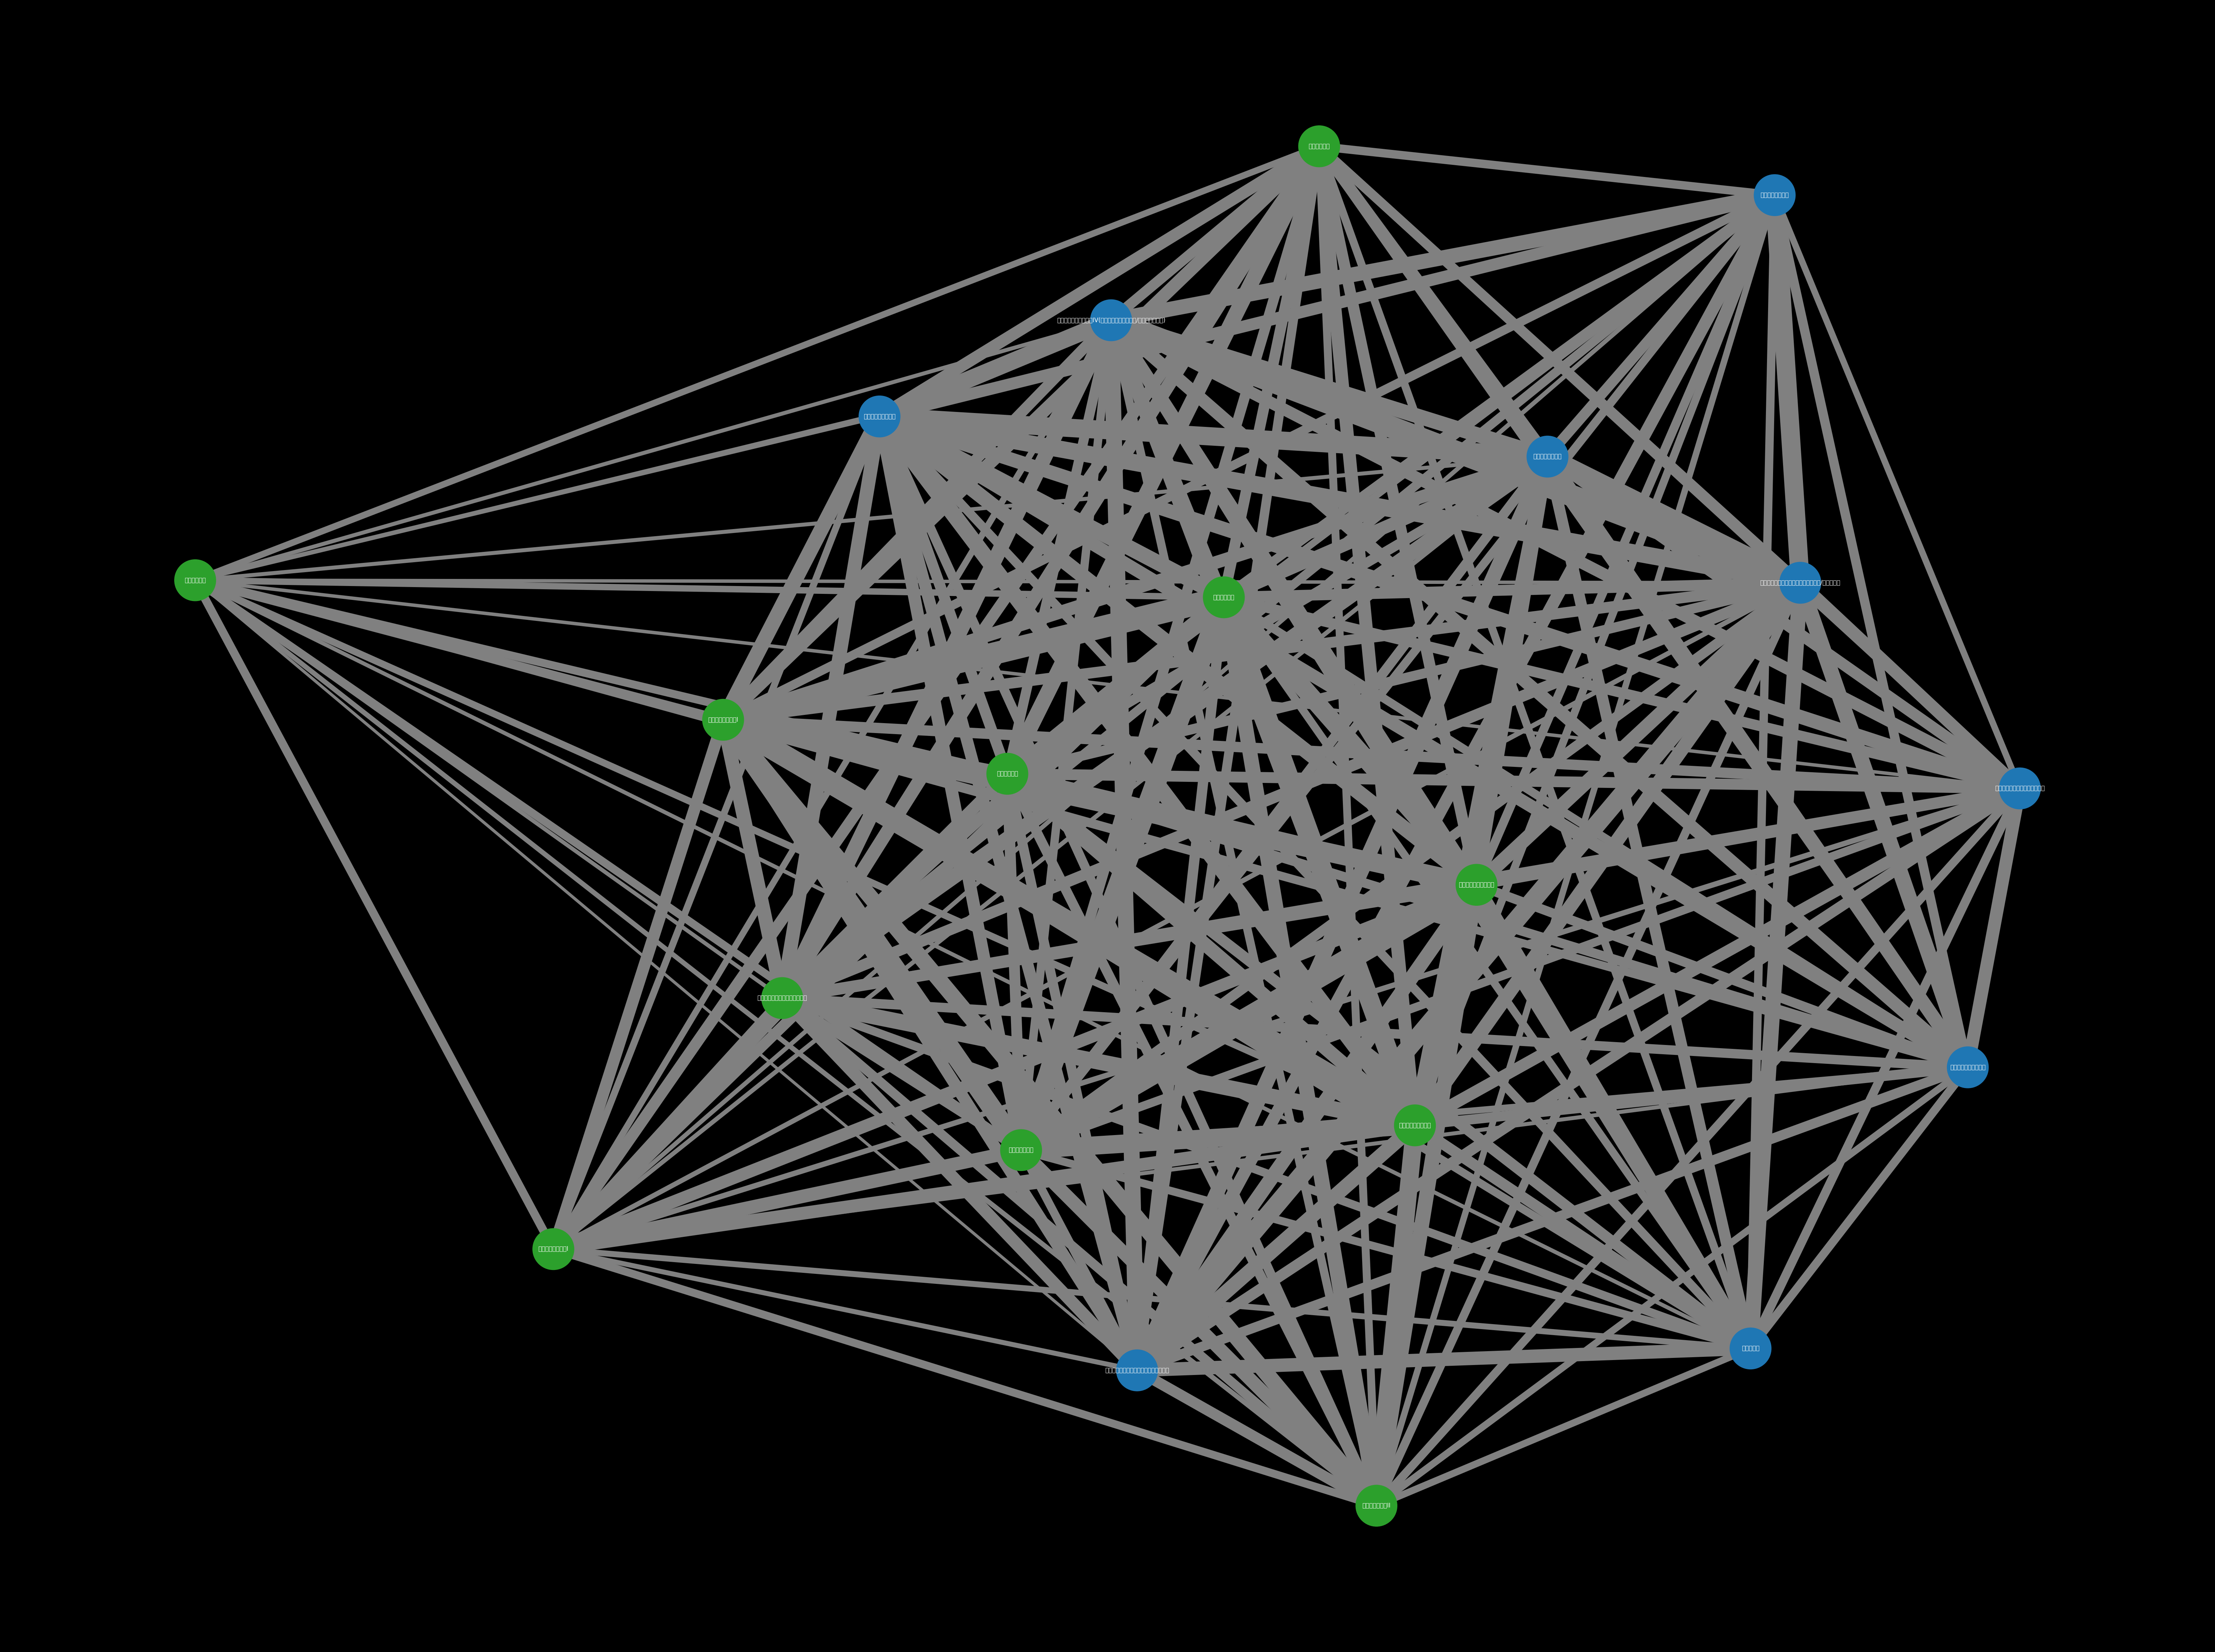

In [201]:
import itertools
# ネットワークを初期化
G = nx.Graph()

temp = temp[temp['関連トピック'].isin([0, 2])]
df = temp.sample(20, random_state=8)
# ノードを追加
for index, row in df.iterrows():
    G.add_node(row['授業科目名'], topic=row['関連トピック'])

# エッジの重み計算
for (idx1, row1), (idx2, row2) in itertools.combinations(df.iterrows(), 2):
    keywords1 = row1['拡張キーワード']
    keywords2 = row2['拡張キーワード']
    common_keywords = set(keywords1).intersection(set(keywords2))
    if common_keywords:
        G.add_edge(row1['授業科目名'], row2['授業科目名'], weight=len(common_keywords))

#トピックIDに基づいて色をマッピング
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
node_colors = [color_map[G.nodes[node]['topic']] for node in G]

# ネットワークの描画
pos = nx.spring_layout(G)  # ノードのポジション
edges = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges]  # エッジの重みに基づく線の太さ

plt.figure(figsize=(80, 60))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=7000)
nx.draw_networkx_labels(G, pos, font_color='white')
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray')

#plt.title('授業間のキーワード重複に基づくネットワーク')
#plt.title('授業間のキーワード重複に基づくネットワーク', fontsize=10)
plt.axis('off')  # 軸を非表示にする

fig = plt.gcf()
ax = plt.gca()

# 背景色を黒に設定
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

plt.show()

In [202]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# クラス内の重みとクラス間の重みの計算
within_class_weight = 0
between_class_weight = 0

for u, v, data in G.edges(data=True):
    if G.nodes[u]['topic'] == G.nodes[v]['topic']:
        within_class_weight += data['weight']
    else:
        between_class_weight += data['weight']

# 重みの比を計算
if within_class_weight > 0:
    ratio = between_class_weight / within_class_weight
else:
    ratio = 0  # クラス内の重みが0の場合、比を0とする

print(f"クラス間の重み: {between_class_weight}, クラス内の重み: {within_class_weight}, 重みの比: {ratio}")

クラス間の重み: 1876, クラス内の重み: 2373, 重みの比: 0.7905604719764012


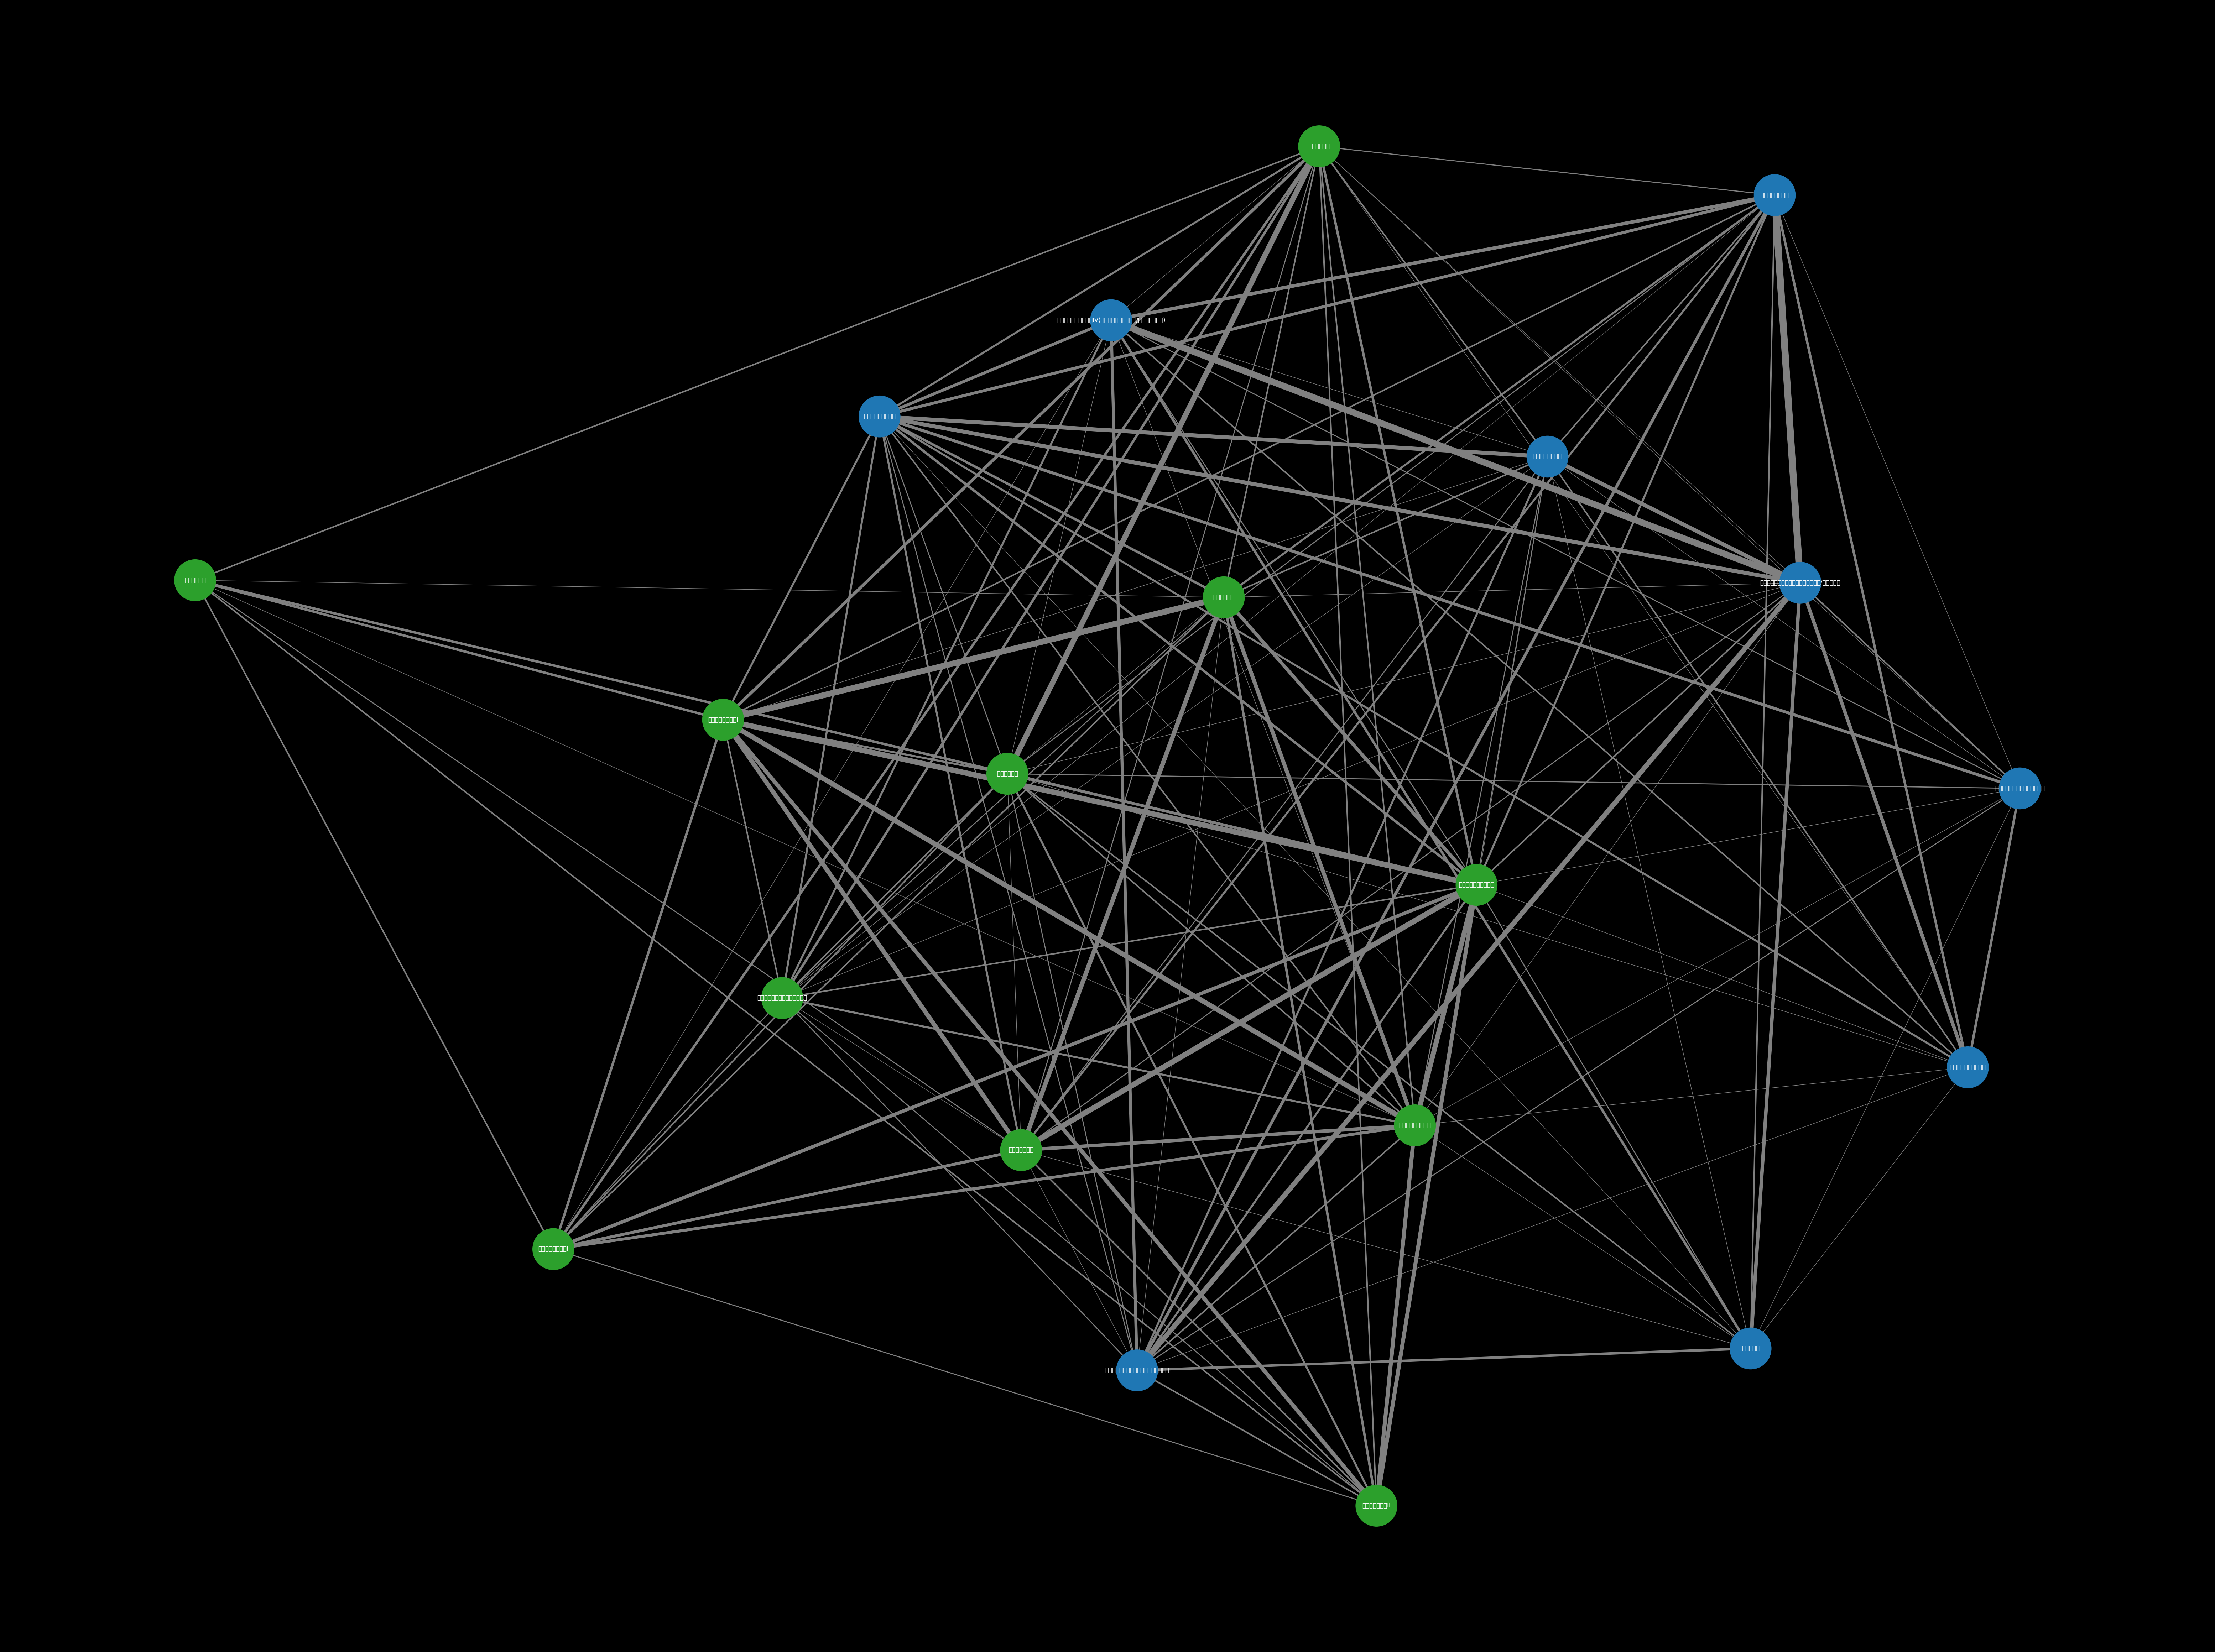

In [203]:
import itertools
# ネットワークを初期化
G = nx.Graph()

temp = temp[temp['関連トピック'].isin([0, 2])]
df = temp.sample(20, random_state=8)
# ノードを追加
for index, row in df.iterrows():
    G.add_node(row['授業科目名'], topic=row['関連トピック'])

# エッジの重み計算
for (idx1, row1), (idx2, row2) in itertools.combinations(df.iterrows(), 2):
    keywords1 = row1['キーワード']
    keywords2 = row2['キーワード']
    common_keywords = set(keywords1).intersection(set(keywords2))
    if common_keywords:
        G.add_edge(row1['授業科目名'], row2['授業科目名'], weight=len(common_keywords))

#トピックIDに基づいて色をマッピング
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
node_colors = [color_map[G.nodes[node]['topic']] for node in G]

# ネットワークの描画
#pos = nx.spring_layout(G)  # ノードのポジション
edges = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges]  # エッジの重みに基づく線の太さ

plt.figure(figsize=(80, 60))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=7000, )
nx.draw_networkx_labels(G, pos, font_color='white')
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray')

#plt.title('授業間のキーワード重複に基づくネットワーク', fontsize=10)
plt.axis('off')  # 軸を非表示にする

fig = plt.gcf()
ax = plt.gca()

# 背景色を黒に設定
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

plt.show()

In [204]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# クラス内の重みとクラス間の重みの計算
within_class_weight = 0
between_class_weight = 0

for u, v, data in G.edges(data=True):
    if G.nodes[u]['topic'] == G.nodes[v]['topic']:
        within_class_weight += data['weight']
    else:
        between_class_weight += data['weight']

# 重みの比を計算
if within_class_weight > 0:
    ratio = between_class_weight / within_class_weight
else:
    ratio = 0  # クラス内の重みが0の場合、比を0とする

print(f"クラス間の重み: {between_class_weight}, クラス内の重み: {within_class_weight}, 重みの比: {ratio}")

クラス間の重み: 118, クラス内の重み: 434, 重みの比: 0.271889400921659


In [ ]:
434
2373

In [125]:
G.edges(data=True)

EdgeDataView([('Experiment Design in Computer Sciences', '情報システム特論', {'weight': 4}), ('Experiment Design in Computer Sciences', '建築設計計画特別演習', {'weight': 4}), ('Experiment Design in Computer Sciences', '環境・エネルギー・安全工学概論', {'weight': 1}), ('Experiment Design in Computer Sciences', '観光の科学', {'weight': 1}), ('Experiment Design in Computer Sciences', '数理最適化理論', {'weight': 6}), ('Experiment Design in Computer Sciences', '経済・政策分析', {'weight': 5}), ('Experiment Design in Computer Sciences', '構造エネルギー工学特別講義V', {'weight': 2}), ('Experiment Design in Computer Sciences', '社会工学特別講義I', {'weight': 8}), ('Experiment Design in Computer Sciences', '振動学特論', {'weight': 6}), ('Experiment Design in Computer Sciences', 'ヒューマンインタフェース特論I', {'weight': 6}), ('Experiment Design in Computer Sciences', 'ヒューマンインタフェース特論II', {'weight': 9}), ('Experiment Design in Computer Sciences', '都市・地域解析学', {'weight': 1}), ('Experiment Design in Computer Sciences', 'レジリエンス社会へ向けての事業継続管理', {'weight': 6}), ('Experiment Design in Comput

In [112]:
data = {
    '授業科目名': ['科目A', '科目B', '科目C', '科目D'],
    'キーワード': ['キーワード1, キーワード2', 'キーワード2, キーワード3', 'キーワード1, キーワード4', 'キーワード1, キーワード2']
}
df = pd.DataFrame(data)

In [111]:
data = {
    '授業科目名': ['科目A', '科目B', '科目C', '科目D'],
    'キーワード': ['キーワード1, キーワード2', 'キーワード2, キーワード3', 'キーワード1, キーワード4', 'キーワード1, キーワード2']
}
df = pd.DataFrame(data)
df

授業科目名           キーワード
0   科目A  キーワード1, キーワード2
1   科目B  キーワード2, キーワード3
2   科目C  キーワード1, キーワード4
3   科目D  キーワード1, キーワード2

In [49]:
pip install matplotlib wordcloud


     -------------------------------------- 299.9/299.9 kB 4.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
!pip install -q japanize-matplotlib
!apt-get -yq install fonts-ipafont-gothic
!ls /usr/share/fonts/opentype/ipafont-gothic

#ライブラリーのインポート
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

#フォントパスの指定。今回はGoogleフォントを使用しました。
font_path = '/content/ShipporiMincho-Regular.ttf'


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
'apt-get' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'ls' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


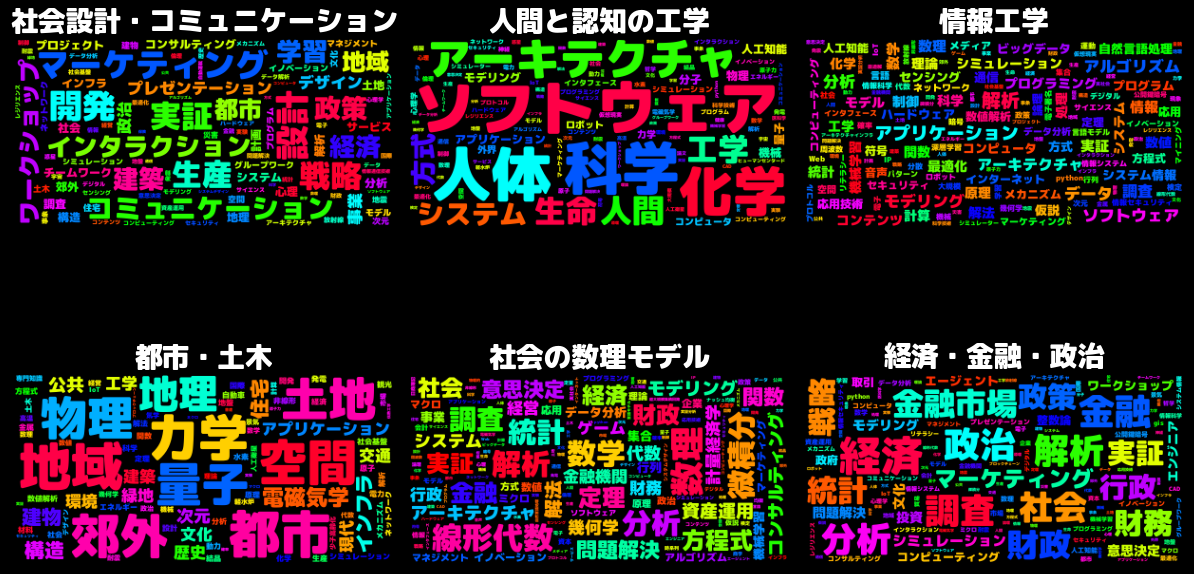

In [92]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import japanize_matplotlib 
import matplotlib.font_manager as fm
# LDAモデルと辞書を設定（この部分は既にあるコードを使用）
# ここにはダミーのコードが入ります。
# 例えば：
# lda_model = あなたのLdaModelのインスタンス
# dictionary = あなたのDictionaryのインスタンス

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axs = axs.flatten()

def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'

def word_count(t):
    l = 20
    while sum(x[1] for x in recommender.lda_model.show_topic(t, l)) < 0.999:
        l += 1
    return l

font_path = 'rounded-l-mplus-1c-black.ttf'
font_prop = fm.FontProperties(fname=font_path, size=20)

#mask = np.array(Image.open("/content/phpYSbfIJ.png"))
topic_number_dict = {0:"社会設計・コミュニケーション", 1:"人間と認知の工学", 2:"情報工学", 3:"都市・土木", 4:"社会の数理モデル", 5:"経済・金融・政治"}

for i, t in enumerate(range(recommender.lda_model.num_topics)):
    l = 30
    if i == 2:
        l = 60
    x = dict(recommender.lda_model.show_topic(t, word_count(t)))
    im = WordCloud(
        font_path=font_path,
        background_color='black',
        colormap="hsv",
        #mask=mask,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im)
    axs[i].axis('off')

# 各サブプロットの背景色を黒に設定
for ax in axs.flatten():
    ax.set_facecolor('black')

# 図全体の背景色も黒に設定
for i, ax in enumerate(axs.flatten()):
    ax.set_title(f"{topic_number_dict[i]}", fontsize=20, color='white', fontproperties=font_prop) 
    
fig.patch.set_facecolor('black')

plt.tight_layout()
plt.show()

In [73]:
sum(x[1] for x in recommender.lda_model.show_topic(2, 60))

0.8592671672813594

In [7]:
recommender.user_profile

array([0.06582496, 0.017784  , 0.06371736, 0.0496872 , 0.01779886,
       0.15434893, 0.02083308, 0.06513524, 0.10014536, 0.01463605,
       0.04495749, 0.00714145, 0.15197808, 0.03113945, 0.19487251])

In [8]:
recommender.df_grad_courses.columns

Index(['授業科目名', '1倍キーワード', '拡張キーワード', 'キーワード', '科目番号', '時間割', '単位数', '実施学期',
       '曜時限', '学位プログラム', '科目区分', '科目区分名', 'シラバス', '関連トピック', 'トピック', 'トピック選好',
       'トピック比率', '推薦スコア', 'おすすめ度'],
      dtype='object')

In [46]:
temp = recommender.df_grad_courses[['授業科目名', 'トピック比率', 'トピック', 'おすすめ度', '時間割']]
#temp = temp.rename(columns={'トピック確度': 'トピック比率'})
# temp = temp.sample(n=10)
temp = temp[temp['トピック'].isin(['人間と認知の工学', '社会設計・コミュニケーション', '情報工学'])]
temp = temp.sample(n=10, random_state=12).sort_values(['トピック', 'トピック比率'], ascending=[True, False])
temp['トピック'] = temp['トピック'].apply(lambda x: topic_number_dict[x])
temp = temp[['授業科目名', 'トピック', 'おすすめ度', '時間割']]
temp

授業科目名 トピック  おすすめ度       時間割
275         拡張生体学    B      2  春AB 火1,2
250        知覚拡張工学    B      2  秋AB 金3,4
173  ヒューマンファクター特論    B      1  夏季休業中 集中
21       データマイニング    C     17  秋AB 月1,2
161    社会工学特別講義II    C     16     秋B 集中
246     自律移動ロボット学    C      8  春季休業中 集中
254        計算力学特論    C      7  秋AB 火3,4
184  都市リスクマネジメント論    A     12  春AB 金1,2
7        制度・政策決定論    A      7  春AB 火3,4
149  ビジネス戦略:理論と実践    A      6  秋AB 水5,6

In [48]:
temp = recommender.df_grad_courses[['授業科目名', 'トピック比率', 'トピック', 'おすすめ度', '時間割']]
#temp = temp.rename(columns={'トピック確度': 'トピック比率'})
# temp = temp.sample(n=10)
temp = temp[temp['トピック'].isin(['人間と認知の工学', '社会設計・コミュニケーション', '情報工学'])]
temp = temp.sample(n=10, random_state=12).sort_values(['トピック', 'トピック比率'], ascending=[True, False])
temp['トピック'] = temp['トピック'].apply(lambda x: topic_number_dict[x])
temp = temp[['授業科目名', 'トピック比率', 'トピック']]
temp

授業科目名    トピック比率 トピック
275         拡張生体学  0.961985    B
250        知覚拡張工学  0.869990    B
173  ヒューマンファクター特論  0.544211    B
21       データマイニング  0.960107    C
161    社会工学特別講義II  0.940097    C
246     自律移動ロボット学  0.486663    C
254        計算力学特論  0.429861    C
184  都市リスクマネジメント論  0.939913    A
7        制度・政策決定論  0.580772    A
149  ビジネス戦略:理論と実践  0.534292    A

In [42]:
topic_number_dict = {"社会設計・コミュニケーション":"A", "人間と認知の工学":"B", "情報工学":"C", "都市・土木":"D", "社会の数理モデル":"E", "経済・金融・政治":"F"}
topic_number_dict

{'社会設計・コミュニケーション': 'A',
 '人間と認知の工学': 'B',
 '情報工学': 'C',
 '都市・土木': 'D',
 '社会の数理モデル': 'E',
 '経済・金融・政治': 'F'}

In [51]:
temp = recommender.df_grad_courses[['授業科目名', 'トピック確度', 'トピック', 'おすすめ度']]
temp = temp.rename(columns={'トピック確度': 'トピック比率'})
temp = temp[temp['トピック'].isin(['C', 'H', 'F'])].sort_values(['授業科目名', 'トピック'])
temp

授業科目名    トピック比率 トピック  おすすめ度
231           システムモデリング  0.597135    C      0
187         システム信頼性解析演習  0.883332    C      0
196              システム制御  0.677195    C      0
195             システム最適化  0.725757    F     10
232  スマートインフォメディアシステム特論  0.866664    F     12
20      ソフトコンピューティング基礎論  0.421728    H      8
235            デジタル制御特論  0.688888    C      0
21             データマイニング  0.866666    H     18
197            データ工学特論I  0.413579    C      0
198           データ工学特論II  0.866664    C      0
202           プログラム理論特論  0.508427    F      7
201           プログラム言語特論  0.883333    F     12
174       プロセスシステムリスク特論  0.766664    C      0
251          マイクロメカニックス  0.844441    C      0
2                ミクロ経済学  0.766666    F     10
69               ミクロ経済学  0.561858    F      7
238             ロボット制御論  0.883333    C      0
221              並行システム  0.866664    F     12
212          信号画像処理特論II  0.813332    F     11
188             原子力安全特論  0.766666    C      0
205              回路工学特論  0.688887    C      0
260              数値流体力学  0.844443    F     11
24            数理モデル解析特論  0.576188    F      8
154             数理最適化理論  0.896296    F     12
258             材料強度学特論  0.688887    C      0
270      構造エネルギー工学特別講義V  0.540510    C      0
272        構造・固体CAE特別演習  0.547318    C      0
256             構造物設計法論  0.866664    C      0
257               混相流工学  0.688884    C      0
273            環境流体工学特論  0.360244    C      0
216            知能感性処理特論  0.511323    C      0
278              神経運動制御  0.506464    C      0
5                  統計分析  0.694126    F      9
246           自律移動ロボット学  0.883333    C      0
265              複合構造特論  0.813332    C      0
254              計算力学特論  0.728610    F     10
263               輸送現象論  0.813332    C      0
239               運動制御論  0.866666    C      0
146            都市・地域解析学  0.579103    C      0
153                離散数理  0.866666    F     12
240              音響工学特論  0.866665    C      0

In [ ]:
temp = recommender.df_grad_courses[['授業科目名', 'トピック確度', 'トピック', 'おすすめ度']]
temp = temp.rename(columns={'トピック確度': 'トピック比率'})
temp = temp[temp['トピック'].isin(['C', 'H'])].sort_values(['トピック', 'トピック比率'], ascending=False)
temp

In [56]:
temp = recommender.df_grad_courses[['授業科目名', 'トピック確度', 'トピック', 'おすすめ度']]
temp = temp.rename(columns={'トピック確度': 'トピック比率'})
temp = temp[temp['トピック'].isin(['C', 'H'])].sort_values(['トピック', 'トピック比率'], ascending=False)
temp

授業科目名    トピック比率 トピック  おすすめ度
21          データマイニング  0.866666    H     18
20   ソフトコンピューティング基礎論  0.421728    H      8
238          ロボット制御論  0.883333    C      0
246        自律移動ロボット学  0.883333    C      0
187      システム信頼性解析演習  0.883332    C      0
239            運動制御論  0.866666    C      0
240           音響工学特論  0.866665    C      0
198        データ工学特論II  0.866664    C      0
256          構造物設計法論  0.866664    C      0
251       マイクロメカニックス  0.844441    C      0
263            輸送現象論  0.813332    C      0
265           複合構造特論  0.813332    C      0
188          原子力安全特論  0.766666    C      0
174    プロセスシステムリスク特論  0.766664    C      0
235         デジタル制御特論  0.688888    C      0
205           回路工学特論  0.688887    C      0
258          材料強度学特論  0.688887    C      0
257            混相流工学  0.688884    C      0
196           システム制御  0.677195    C      0
231        システムモデリング  0.597135    C      0
146         都市・地域解析学  0.579103    C      0
272     構造・固体CAE特別演習  0.547318    C      0
270   構造エネルギー工学特別講義V  0.540510    C      0
216         知能感性処理特論  0.511323    C      0
278           神経運動制御  0.506464    C      0
197         データ工学特論I  0.413579    C      0
273         環境流体工学特論  0.360244    C      0

In [53]:
temp = recommender.df_grad_courses[['授業科目名', 'トピック確度', 'トピック']]
temp = temp.rename(columns={'トピック確度': 'トピック比率'})
temp = temp[temp['トピック'].isin(['C', 'H'])].sort_values(['トピック', ''], ascending=False)
temp

授業科目名    トピック比率 トピック
21          データマイニング  0.866666    H
20   ソフトコンピューティング基礎論  0.421728    H
238          ロボット制御論  0.883333    C
246        自律移動ロボット学  0.883333    C
187      システム信頼性解析演習  0.883332    C
239            運動制御論  0.866666    C
240           音響工学特論  0.866665    C
198        データ工学特論II  0.866664    C
256          構造物設計法論  0.866664    C
251       マイクロメカニックス  0.844441    C
263            輸送現象論  0.813332    C
265           複合構造特論  0.813332    C
188          原子力安全特論  0.766666    C
174    プロセスシステムリスク特論  0.766664    C
235         デジタル制御特論  0.688888    C
205           回路工学特論  0.688887    C
258          材料強度学特論  0.688887    C
257            混相流工学  0.688884    C
196           システム制御  0.677195    C
231        システムモデリング  0.597135    C
146         都市・地域解析学  0.579103    C
272     構造・固体CAE特別演習  0.547318    C
270   構造エネルギー工学特別講義V  0.540510    C
216         知能感性処理特論  0.511323    C
278           神経運動制御  0.506464    C
197         データ工学特論I  0.413579    C
273         環境流体工学特論  0.360244    C

In [35]:
recommender.df_grad_courses[['授業科目名', 'トピック', 'おすすめ度']]

授業科目名 トピック  おすすめ度
0    MDA異分野連携ゼミナール    N      1
1       社会工学のための数学    J      1
2           ミクロ経済学    F      5
3       社会シミュレーション    K      6
4            ゲーム理論    E      5
..             ...  ...    ...
277   実世界指向インタフェース    A      3
278         神経運動制御    C      1
279         触覚の計算論    A      3
280       実験心理学方法論    E      5
281         機械学習演習    G      5

[177 rows x 3 columns]

In [33]:
recommender.df_grad_courses[['授業科目名', 'トピック', 'おすすめ度', '時間割']].sort_values('トピック確度', ascending=False).head(20).reset_index(inplace=False, drop=True)

KeyError: 'トピック確度'

In [ ]:
word2vecは精度が低く解釈性も微妙

In [ ]:
recommender.df_grad_courses[['授業科目名', 'トピック']].sort_values('トピック確度', ascending=False).head(20).reset_index(inplace=False, drop=True)

In [4]:
!pip install pydantic

     -------------------------------------- 431.4/431.4 kB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 15.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from pydantic import BaseModel, Field, StrictInt, ValidationError, field_validator, ConfigDict

class MachineConfig(BaseModel):
    model_config = ConfigDict(
        frozen=True,  # Prevents changes to the instance
        extra="forbid",  # No extra fields allowed
        validate_assignment=True,  # Validates values during assignment
    )

    CC_1_UNUSE_START: StrictInt = Field(
        0, description="Start hour for CC-1 non-use period", ge=0, le=23
    )

    CC_1_UNUSE_END: StrictInt = Field(
        10, description="End hour for CC-1 non-use period", ge=0, le=23
    )

    @field_validator("CC_1_UNUSE_END")
    @classmethod
    def validate_end_times(cls, v: int, info) -> int:
        print(f"Validating field: {info.field_name}, value: {v}, data: {info.data}")
        return v

# 正常なインスタンス生成
config = MachineConfig(CC_1_UNUSE_START=8, CC_1_UNUSE_END=10)

# エラーケース
try:
    config = MachineConfig(CC_1_UNUSE_START=8, CC_1_UNUSE_END=8)
except ValidationError as e:
    print(e)


Validating field: CC_1_UNUSE_END, value: 10, data: {'CC_1_UNUSE_START': 8}
Validating field: CC_1_UNUSE_END, value: 8, data: {'CC_1_UNUSE_START': 8}


In [13]:
class MachineConfig(BaseModel):
    model_config = ConfigDict(
        frozen=True,  # Makes the config immutable
        extra="forbid",  # Prevents additional fields
        validate_assignment=True,  # Validates even after initialization
    )

    CC_1_UNUSE_START: StrictInt = Field(
        0, description="Start hour for CC-1 non-use period", ge=0, le=23
    )

    CC_1_UNUSE_END: StrictInt = Field(
        10, description="End hour for CC-1 non-use period ", ge=0, le=23
    )

    AC_1_UNUSE_START: StrictInt = Field(
        0, description="Start hour for AC-1 non-use period", ge=0, le=23
    )

    AC_1_UNUSE_END: StrictInt = Field(
        10, description="End hour for AC-1 non-use period", ge=0, le=23
    )

    @field_validator("CC_1_UNUSE_END", "AC_1_UNUSE_END")
    @classmethod
    def validate_end_times(cls, v: int, info) -> int:
        # Get the corresponding start time based on the field being validated
        field_name = info.field_name
        machine_type = field_name.split("_UNUSE_")[0]  # Gets "CC_1" or "AC_1"
        start_field = f"{machine_type}_UNUSE_START"

        start_time = info.data.get(start_field)
        if start_time is None:
            return v

        if start_time == v:
            raise ValueError(
                f"{machine_type} end time ({v}) cannot be equal to start time ({start_time})"
            )

        return v


# 正常なインスタンス生成
config = MachineConfig(CC_1_UNUSE_START=8, CC_1_UNUSE_END=10)

# エラーケース
try:
    config = MachineConfig(CC_1_UNUSE_START=8, CC_1_UNUSE_END=8)
except ValidationError as e:
    print(e)


1 validation error for MachineConfig
CC_1_UNUSE_END
  Value error, CC_1 end time (8) cannot be equal to start time (8) [type=value_error, input_value=8, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/value_error
